# Fundamentals of NumPy

## Learning Objectives

By the end of this module, you will be able to:

* Understand why NumPy is essential for efficient data manipulation in Python
* Create and manipulate NumPy arrays using vectorized operations
* Apply broadcasting techniques to perform mathematical operations on arrays
* Implement NumPy arrays in model-building scenarios
* Practice NumPy fundamentals through hands-on exercises with real data

## Why Learn NumPy?

NumPy (Numerical Python) is the foundation of the Python data science ecosystem. It provides powerful tools for working with large datasets and performing mathematical operations efficiently.

### Key Benefits:

* **Performance**: NumPy operations are 10-100x faster than pure Python
* **Memory Efficiency**: Uses contiguous memory layout for better performance
* **Foundation**: Required by Pandas, Scikit-learn, Matplotlib, and other libraries
* **Vectorization**: Eliminates the need for explicit loops in mathematical operations

In [ ]:
%pip install numpy

In [1]:
# Let's demonstrate the performance difference
import numpy as np
import time

# Create large datasets
size = 1000000
python_list1 = list(range(size))
python_list2 = list(range(size, 2*size))
numpy_array1 = np.arange(size)
numpy_array2 = np.arange(size, 2*size)

# Time Python list operation
start_time = time.time()
python_result = [a + b for a, b in zip(python_list1, python_list2)]
python_time = time.time() - start_time

# Time NumPy array operation
start_time = time.time()
numpy_result = numpy_array1 + numpy_array2
numpy_time = time.time() - start_time

print(f"Python list operation time: {python_time:.4f} seconds")
print(f"NumPy array operation time: {numpy_time:.4f} seconds")
print(f"NumPy is {python_time/numpy_time:.1f}x faster!")

Python list operation time: 0.1021 seconds
NumPy array operation time: 0.0047 seconds
NumPy is 21.9x faster!


## Efficient Matrix Math

### NumPy vs Pure Python

Let's compare how mathematical operations are performed in pure Python versus NumPy:

In [2]:
# Pure Python approach (slow)
list1 = [1, 2, 3, 4, 5]
list2 = [10, 20, 30, 40, 50]

# Slow element-wise addition
result_python = []
for i in range(len(list1)):
    result_python.append(list1[i] + list2[i])

print("Pure Python result:", result_python)

# NumPy approach (fast)
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([10, 20, 30, 40, 50])

# Fast vectorized addition
result_numpy = array1 + array2

print("NumPy result:", result_numpy)
print("\nBoth produce the same result, but NumPy is much faster and cleaner!")

Pure Python result: [11, 22, 33, 44, 55]
NumPy result: [11 22 33 44 55]

Both produce the same result, but NumPy is much faster and cleaner!


### Problems with Pure Python:

* Explicit loops required
* Type checking for each element
* Python object overhead

### Benefits of NumPy:

* Single operation on entire arrays
* Pre-compiled C code
* Homogeneous data types
* Optimized memory access

## NumPy and C

NumPy's performance advantage comes from its implementation in C and optimized algorithms.

### Key Performance Features:

* **Contiguous Memory Layout**: Arrays stored as continuous blocks in memory
* **Single Data Type**: All elements are the same type (no type checking overhead)
* **SIMD Instructions**: Modern processors can operate on multiple values simultaneously
* **Optimized Libraries**: Uses highly optimized BLAS and LAPACK libraries

In [3]:
# Demonstrate memory efficiency
import sys

# Python list
python_list = [1, 2, 3, 4, 5] * 1000
python_memory = sys.getsizeof(python_list) + sum(sys.getsizeof(item) for item in python_list)

# NumPy array
numpy_array = np.array([1, 2, 3, 4, 5] * 1000)
numpy_memory = numpy_array.nbytes

print(f"Python list memory usage: {python_memory:,} bytes")
print(f"NumPy array memory usage: {numpy_memory:,} bytes")
print(f"NumPy uses {python_memory/numpy_memory:.1f}x less memory!")

# Show array properties
print(f"\nArray dtype: {numpy_array.dtype}")
print(f"Array shape: {numpy_array.shape}")
print(f"Array size: {numpy_array.size} elements")

Python list memory usage: 180,056 bytes
NumPy array memory usage: 40,000 bytes
NumPy uses 4.5x less memory!

Array dtype: int64
Array shape: (5000,)
Array size: 5000 elements


## NumPy Array Basics

NumPy arrays (ndarrays) are the fundamental data structure for numerical computing in Python.

### Creating Arrays

In [ ]:
import numpy as np

# From Lists
# 1D array
arr_1d = np.array([1, 2, 3, 4])
print("1D array:", arr_1d)

# 2D array
arr_2d = np.array([[1, 2], [3, 4]])
print("\n2D array:")
print(arr_2d)

# Specify data type
arr_float = np.array([1, 2, 3], dtype=float)
print("\nFloat array:", arr_float)
print("Data type:", arr_float.dtype)

In [ ]:
# Using Functions

# Array of zeros
zeros = np.zeros((3, 4))
print("Array of zeros:")
print(zeros)

# Array of ones
ones = np.ones((2, 3))
print("\nArray of ones:")
print(ones)

# Range of values
range_arr = np.arange(0, 10, 2)
print("\nRange array:", range_arr)

# Evenly spaced values
linspace_arr = np.linspace(0, 1, 5)
print("\nLinspace array:", linspace_arr)

# Random values
np.random.seed(42)  # For reproducible results
random_arr = np.random.random((2, 3))
print("\nRandom array:")
print(random_arr)

## Basic Array Operations

NumPy provides a rich set of operations for manipulating and analyzing arrays.

In [ ]:
# Create a sample array
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print("Sample array:")
print(arr)
print("\n" + "="*40)

# Array properties
print(f"Shape: {arr.shape}")        # (2, 3)
print(f"Data type: {arr.dtype}")    # int64 (or int32)
print(f"Dimensions: {arr.ndim}")    # 2
print(f"Size: {arr.size}")          # 6
print(f"Item size: {arr.itemsize} bytes")  # 8 bytes for int64

print("\n" + "="*40)

# Mathematical operations
print(f"Sum: {arr.sum()}")          # 21
print(f"Mean: {arr.mean()}")        # 3.5
print(f"Standard deviation: {arr.std():.2f}")  # 1.71
print(f"Max: {arr.max()}")          # 6
print(f"Min: {arr.min()}")          # 1
print(f"Argmax (index of max): {arr.argmax()}")  # 5
print(f"Argmin (index of min): {arr.argmin()}")  # 0

In [ ]:
# Operations along specific axes
print("Operations along axes:")
print("\nOriginal array:")
print(arr)

# axis=0 operates along rows (down columns)
print(f"\nSum along axis=0 (column sums): {arr.sum(axis=0)}")
print(f"Mean along axis=0 (column means): {arr.mean(axis=0)}")

# axis=1 operates along columns (across rows)
print(f"\nSum along axis=1 (row sums): {arr.sum(axis=1)}")
print(f"Mean along axis=1 (row means): {arr.mean(axis=1)}")

## Vectorized (Broadcast) Operations

**Vectorization** allows you to perform operations on entire arrays without explicit loops.

**Broadcasting** enables operations between arrays of different shapes.

In [ ]:
# Vectorized operations
arr = np.array([1, 2, 3, 4, 5])
print("Original array:", arr)

# Scalar operations (broadcasting)
result = arr * 2  # Multiplies every element by 2
print("Multiplied by 2:", result)

result = arr + 10  # Adds 10 to every element
print("Added 10:", result)

result = arr ** 2  # Squares every element
print("Squared:", result)

# Mathematical functions
result = np.sqrt(arr)  # Square root of every element
print("Square root:", result)

result = np.sin(arr)  # Sine of every element
print("Sine values:", result)

In [ ]:
# Broadcasting example
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
vector = np.array([10, 20, 30])

print("Matrix:")
print(matrix)
print("\nVector:")
print(vector)

# Broadcasting: adds vector to each row of matrix
result = matrix + vector
print("\nMatrix + Vector (broadcasting):")
print(result)

# More broadcasting examples
column_vector = np.array([[100], [200]])
print("\nColumn vector:")
print(column_vector)

result = matrix + column_vector
print("\nMatrix + Column vector (broadcasting):")
print(result)

### Broadcasting Rules

NumPy follows these rules for broadcasting:

1. Arrays are aligned from the rightmost dimension
2. Dimensions of size 1 can be "stretched" to match
3. Missing dimensions are assumed to be size 1
4. Arrays are compatible if dimensions are equal or one is 1

In [ ]:
# Broadcasting rules demonstration
print("Broadcasting examples:")

# Example 1: (3,) + (3,) = (3,)
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
print(f"\n{a.shape} + {b.shape} = {(a + b).shape}")
print(f"{a} + {b} = {a + b}")

# Example 2: (3,) + scalar = (3,)
c = 100
print(f"\n{a.shape} + scalar = {(a + c).shape}")
print(f"{a} + {c} = {a + c}")

# Example 3: (2,3) + (3,) = (2,3)
d = np.array([[1, 2, 3], [4, 5, 6]])
e = np.array([10, 20, 30])
print(f"\n{d.shape} + {e.shape} = {(d + e).shape}")
print(f"Result:\n{d + e}")

# Example 4: (2,3) + (2,1) = (2,3)
f = np.array([[100], [200]])
print(f"\n{d.shape} + {f.shape} = {(d + f).shape}")
print(f"Result:\n{d + f}")

## Array Indexing and Slicing

### Basic Array Indexing

In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

print("Sample 3x3 array:")
print(arr)
print("\n" + "="*40)

# Single element access
print(f"Element at [0, 1]: {arr[0, 1]}")    # 2
print(f"Element at [1, 2]: {arr[1, 2]}")    # 6
print(f"Element at [-1, -1]: {arr[-1, -1]}")

print("\n" + "="*40)

# Entire row selection
print(f"First row [0, :]: {arr[0, :]}")
print(f"Second row [1, :]: {arr[1, :]}")
print(f"Last row [-1, :]: {arr[-1, :]}")

print("\n" + "="*40)

# Entire column selection
print(f"First column [:, 0]: {arr[:, 0]}")
print(f"Second column [:, 1]: {arr[:, 1]}")
print(f"Last column [:, -1]: {arr[:, -1]}")

print("\n" + "="*40)

# Slicing
print("Slice [0:2, 1:3]:")
print(arr[0:2, 1:3])
# [[2 3]
#  [5 6]]

print("\nSlice [1:, :2]:")
print(arr[1:, :2])
# [[4 5]
#  [7 8]]

### Array Indexing Key Points:

* Access elements using zero-based indices: `arr[row, column]`
* Use `:` to select entire rows or columns: `arr[:, 0]` for first column
* Slicing works like Python lists: `arr[1:3, 0:2]` selects a subarray
* Negative indices count from the end: `arr[-1, :]` for last row

### Boolean Array Indexing

In [ ]:
# Boolean indexing
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

print("Original array:")
print(arr)

# Create boolean mask
mask = arr > 5
print("\nBoolean mask (arr > 5):")
print(mask)
# [[False False False]
#  [False False  True]
#  [ True  True  True]]

# Select elements using the mask
print("\nElements where arr > 5:")
print(arr[mask])    # [6 7 8 9]

# Multiple conditions
mask_complex = (arr > 3) & (arr < 8)
print("\nElements where 3 < arr < 8:")
print(arr[mask_complex])  # [4 5 6 7]

# Conditional modification
arr_copy = arr.copy()
arr_copy[arr_copy > 5] = 0
print("\nArray after setting values > 5 to 0:")
print(arr_copy)
# [[1 2 3]
#  [4 5 0]
#  [0 0 0]]

In [ ]:
# More advanced boolean indexing examples
data = np.random.randint(1, 20, (5, 4))
print("Random data array:")
print(data)

# Find elements divisible by 3
divisible_by_3 = data % 3 == 0
print("\nElements divisible by 3:")
print(data[divisible_by_3])

# Replace even numbers with -1
data_modified = data.copy()
data_modified[data_modified % 2 == 0] = -1
print("\nArray with even numbers replaced by -1:")
print(data_modified)

# Count elements meeting condition
count_greater_than_10 = np.sum(data > 10)
print(f"\nNumber of elements > 10: {count_greater_than_10}")

# Get indices of elements meeting condition
indices = np.where(data > 15)
print(f"\nIndices where data > 15: {list(zip(indices[0], indices[1]))}")

### Boolean Indexing Key Points:

* Create boolean masks to filter arrays: `mask = arr > value`
* Use masks to select elements: `arr[mask]` returns elements where mask is True
* Modify elements conditionally: `arr[arr > value] = new_value`
* Combine conditions with `&` (and), `|` (or), `~` (not)
* Use parentheses with multiple conditions: `(arr > 3) & (arr < 8)`

## NumPy Aggregation Functions

NumPy provides many functions for computing summary statistics and aggregations.

In [5]:
# Create sample data for aggregation
np.random.seed(42)
data = np.random.randint(1, 100, (4, 5))
print("Sample data:")
print(data)
print("\n" + "="*50)

# Basic aggregations
print(f"Sum of all elements: {np.sum(data)}")
print(f"Mean of all elements: {np.mean(data):.2f}")
print(f"Median of all elements: {np.median(data):.2f}")
print(f"Standard deviation: {np.std(data):.2f}")
print(f"Variance: {np.var(data):.2f}")
print(f"Minimum value: {np.min(data)}")
print(f"Maximum value: {np.max(data)}")
print(f"Range (max - min): {np.max(data) - np.min(data)}")

print("\n" + "="*50)

# Percentiles
print(f"25th percentile: {np.percentile(data, 25):.2f}")
print(f"50th percentile (median): {np.percentile(data, 50):.2f}")
print(f"75th percentile: {np.percentile(data, 75):.2f}")

print("\n" + "="*50)

# Aggregations along axes
print("Sum along axis=0 (column sums):")
print(np.sum(data, axis=0))

print("\nSum along axis=1 (row sums):")
print(np.sum(data, axis=1))

print("\nMean along axis=0 (column means):")
print(np.mean(data, axis=0))

print("\nMean along axis=1 (row means):")
print(np.mean(data, axis=1))

Sample data:
[[52 93 15 72 61]
 [21 83 87 75 75]
 [88 24  3 22 53]
 [ 2 88 30 38  2]]
Sum of all elements: 984
Mean of all elements: 49.20
Median of all elements: 52.50
Standard deviation: 31.57
Variance: 996.86
Minimum value: 2
Maximum value: 93
Range (max - min): 91

25th percentile: 21.75
50th percentile (median): 52.50
75th percentile: 77.00

Sum along axis=0 (column sums):
[163 288 135 207 191]

Sum along axis=1 (row sums):
[293 341 190 160]

Mean along axis=0 (column means):
[40.75 72.   33.75 51.75 47.75]

Mean along axis=1 (row means):
[58.6 68.2 38.  32. ]


In [6]:
# More advanced aggregations
print("Advanced aggregation functions:")

# Cumulative operations
arr = np.array([1, 2, 3, 4, 5])
print(f"\nOriginal array: {arr}")
print(f"Cumulative sum: {np.cumsum(arr)}")
print(f"Cumulative product: {np.cumprod(arr)}")

# Unique values
arr_with_duplicates = np.array([1, 2, 2, 3, 3, 3, 4, 5, 5])
unique_vals, counts = np.unique(arr_with_duplicates, return_counts=True)
print(f"\nArray with duplicates: {arr_with_duplicates}")
print(f"Unique values: {unique_vals}")
print(f"Counts: {counts}")

# Sorting
unsorted_arr = np.array([64, 34, 25, 12, 22, 11, 90])
print(f"\nUnsorted array: {unsorted_arr}")
print(f"Sorted array: {np.sort(unsorted_arr)}")
print(f"Indices that would sort the array: {np.argsort(unsorted_arr)}")

# Conditional aggregations
print(f"\nCount of elements > 50: {np.sum(unsorted_arr > 50)}")
print(f"Any element > 80: {np.any(unsorted_arr > 80)}")
print(f"All elements > 10: {np.all(unsorted_arr > 10)}")

Advanced aggregation functions:

Original array: [1 2 3 4 5]
Cumulative sum: [ 1  3  6 10 15]
Cumulative product: [  1   2   6  24 120]

Array with duplicates: [1 2 2 3 3 3 4 5 5]
Unique values: [1 2 3 4 5]
Counts: [1 2 3 1 2]

Unsorted array: [64 34 25 12 22 11 90]
Sorted array: [11 12 22 25 34 64 90]
Indices that would sort the array: [5 3 4 2 1 0 6]

Count of elements > 50: 2
Any element > 80: True
All elements > 10: True


## Using NumPy for Model-Building

NumPy is essential for implementing mathematical models and algorithms from scratch. Let's implement a simple linear regression using only NumPy.

In [7]:
# Linear regression example using NumPy
def linear_regression(X, y):
    """
    Simple linear regression using normal equation
    θ = (X^T X)^-1 X^T y
    """
    # Add bias term (column of ones)
    X_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    # Normal equation: θ = (X^T X)^-1 X^T y
    theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    
    return theta

def predict(X, theta):
    """Make predictions using learned parameters"""
    X_bias = np.column_stack([np.ones(X.shape[0]), X])
    return X_bias @ theta

# Example usage
# Generate sample data: y = 2x + 1 + noise
np.random.seed(42)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
true_slope = 2
true_intercept = 1
noise = np.random.normal(0, 0.5, X.shape[0])
y = true_slope * X.flatten() + true_intercept + noise

print("Training data:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X: {X.flatten()}")
print(f"y: {y}")

# Train the model
coefficients = linear_regression(X, y)
intercept, slope = coefficients[0], coefficients[1]

print(f"\nTrue parameters: intercept={true_intercept}, slope={true_slope}")
print(f"Learned parameters: intercept={intercept:.2f}, slope={slope:.2f}")

# Make predictions
y_pred = predict(X, coefficients)
print(f"\nPredictions: {y_pred}")

# Calculate error metrics
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - y_pred))

print(f"\nError metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Training data:
X shape: (10, 1)
y shape: (10,)
X: [ 1  2  3  4  5  6  7  8  9 10]
y: [ 3.24835708  4.93086785  7.32384427  9.76151493 10.88292331 12.88293152
 15.78960641 17.38371736 18.76526281 21.27128002]

True parameters: intercept=1, slope=2
Learned parameters: intercept=1.24, slope=2.00

Predictions: [ 3.23955639  5.23610621  7.23265602  9.22920583 11.22575565 13.22230546
 15.21885528 17.21540509 19.21195491 21.20850472]

Error metrics:
Mean Squared Error: 0.1175
Root Mean Squared Error: 0.3428
Mean Absolute Error: 0.2868


Matplotlib is building the font cache; this may take a moment.


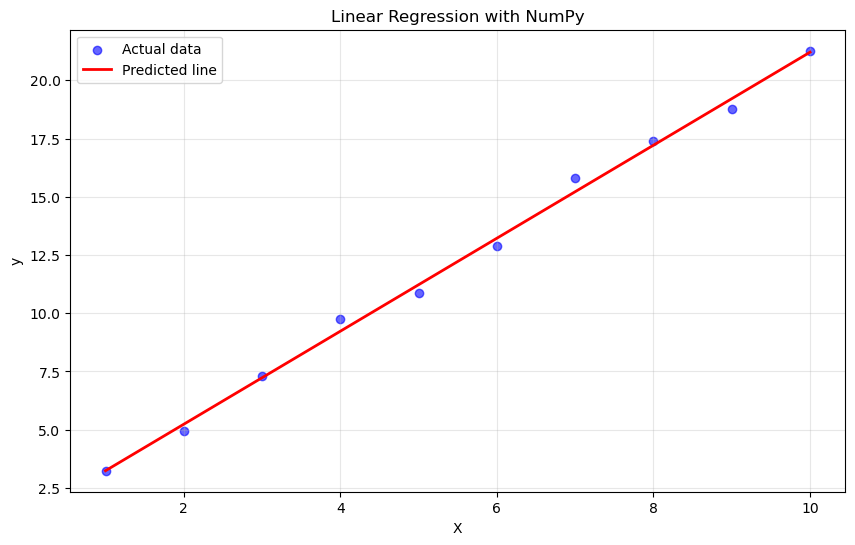

In [8]:
# Visualize the results (optional - requires matplotlib)
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with NumPy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except ImportError:
    print("Matplotlib not available for visualization")
    print("But the linear regression implementation works perfectly with NumPy!")

### Advanced NumPy Example: K-Means Clustering

In [ ]:
# Simple K-means clustering implementation using NumPy
def kmeans(X, k, max_iters=100, random_state=42):
    """
    Simple K-means clustering implementation
    """
    np.random.seed(random_state)
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iteration in range(max_iters):
        # Assign points to closest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[closest_cluster == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations")
            break
            
        centroids = new_centroids
    
    return centroids, closest_cluster

# Generate sample data
np.random.seed(42)
cluster1 = np.random.normal([2, 2], 0.5, (50, 2))
cluster2 = np.random.normal([6, 6], 0.5, (50, 2))
cluster3 = np.random.normal([2, 6], 0.5, (50, 2))
X = np.vstack([cluster1, cluster2, cluster3])

print(f"Generated {X.shape[0]} data points with {X.shape[1]} features")
print(f"Data shape: {X.shape}")
print(f"First 5 points: \n{X[:5]}")

# Perform K-means clustering
k = 3
centroids, labels = kmeans(X, k)

print(f"\nFinal centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: [{centroid[0]:.2f}, {centroid[1]:.2f}]")

print(f"\nCluster assignments (first 10): {labels[:10]}")
print(f"Cluster sizes: {np.bincount(labels)}")

## Practical Exercise: Data Analysis with NumPy

Let's put everything together with a practical data analysis example.

In [ ]:
# Simulate sales data for a retail company
np.random.seed(42)

# Generate data for 12 months, 4 product categories, 5 stores
months = 12
categories = 4
stores = 5

# Sales data: shape (months, categories, stores)
sales_data = np.random.normal(1000, 200, (months, categories, stores))
sales_data = np.abs(sales_data)  # Ensure positive sales

print(f"Sales data shape: {sales_data.shape}")
print(f"Total data points: {sales_data.size}")
print(f"Memory usage: {sales_data.nbytes} bytes")

print("\nFirst month's data (categories × stores):")
print(sales_data[0])

In [ ]:
# Analyze the sales data

# 1. Total sales across all dimensions
total_sales = np.sum(sales_data)
print(f"Total sales across all months/categories/stores: ${total_sales:,.2f}")

# 2. Monthly sales (sum across categories and stores)
monthly_sales = np.sum(sales_data, axis=(1, 2))
print(f"\nMonthly sales: {monthly_sales}")
print(f"Best month: Month {np.argmax(monthly_sales) + 1} (${monthly_sales.max():,.2f})")
print(f"Worst month: Month {np.argmin(monthly_sales) + 1} (${monthly_sales.min():,.2f})")

# 3. Category performance (sum across months and stores)
category_sales = np.sum(sales_data, axis=(0, 2))
print(f"\nCategory sales: {category_sales}")
print(f"Best category: Category {np.argmax(category_sales) + 1} (${category_sales.max():,.2f})")

# 4. Store performance (sum across months and categories)
store_sales = np.sum(sales_data, axis=(0, 1))
print(f"\nStore sales: {store_sales}")
print(f"Best store: Store {np.argmax(store_sales) + 1} (${store_sales.max():,.2f})")

# 5. Statistical analysis
print(f"\nStatistical Summary:")
print(f"Mean daily sales: ${np.mean(sales_data):,.2f}")
print(f"Median daily sales: ${np.median(sales_data):,.2f}")
print(f"Standard deviation: ${np.std(sales_data):,.2f}")
print(f"Coefficient of variation: {np.std(sales_data)/np.mean(sales_data):.2%}")

In [ ]:
# Advanced analysis with boolean indexing

# Find high-performing periods (sales > 1.5 * mean)
threshold = 1.5 * np.mean(sales_data)
high_sales_mask = sales_data > threshold
high_sales_count = np.sum(high_sales_mask)
high_sales_percentage = (high_sales_count / sales_data.size) * 100

print(f"\nHigh Performance Analysis (sales > ${threshold:,.2f}):")
print(f"Number of high-sales periods: {high_sales_count}")
print(f"Percentage of high-sales periods: {high_sales_percentage:.1f}%")

# Identify underperforming areas (sales < 0.5 * mean)
low_threshold = 0.5 * np.mean(sales_data)
low_sales_mask = sales_data < low_threshold
low_sales_count = np.sum(low_sales_mask)

print(f"\nUnderperforming periods (sales < ${low_threshold:,.2f}):")
print(f"Number of low-sales periods: {low_sales_count}")
print(f"Percentage of low-sales periods: {(low_sales_count / sales_data.size) * 100:.1f}%")

# Growth analysis (month-over-month)
monthly_growth = np.diff(monthly_sales) / monthly_sales[:-1] * 100
print(f"\nMonth-over-Month Growth Rates:")
for i, growth in enumerate(monthly_growth):
    print(f"Month {i+1} to {i+2}: {growth:+.1f}%")

print(f"\nAverage monthly growth: {np.mean(monthly_growth):+.1f}%")
print(f"Most volatile month transition: Month {np.argmax(np.abs(monthly_growth))+1} to {np.argmax(np.abs(monthly_growth))+2}")

## Reflection Questions

Take a moment to consider these questions about NumPy fundamentals:

* Why is NumPy significantly faster than pure Python for numerical operations?
* When would you choose to use broadcasting instead of explicit loops?
* How do vectorized operations change the way you think about solving problems?
* What are the key benefits of using homogeneous arrays versus Python lists?
* How does understanding NumPy help you work with higher-level libraries like Pandas?


## Summary

In this chapter, you learned:

* **Why NumPy is fast and essential for data science** - C implementation, vectorized operations, and memory efficiency
* **How vectorized operations and broadcasting make array math efficient and easy** - No more explicit loops!
* **Array creation, indexing, and manipulation techniques** - The building blocks of data analysis
* **Real-world applications** - From simple statistics to implementing machine learning algorithms

### The main idea: 
With NumPy, you work with whole arrays, not loops over elements. This paradigm shift is fundamental to efficient data science in Python.


## Additional Resources

### Core Documentation
* [NumPy Documentation](https://numpy.org/doc/stable/)
* [NumPy Quickstart Tutorial](https://numpy.org/doc/stable/user/quickstart.html)
* [From Python to NumPy](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)
* [NumPy Illustrated](https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d)

### Additional Practice Resources
* [100 NumPy Exercises](https://github.com/rougier/numpy-100)
* [NumPy Tutorial on Real Python](https://realpython.com/numpy-tutorial/)
* [SciPy Lecture Notes](https://scipy-lectures.org/intro/numpy/index.html)
* [NumPy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

### Performance and Optimization
* [NumPy Performance Tips](https://numpy.org/doc/stable/user/basics.performance.html)
* [Understanding NumPy Memory Layout](https://numpy.org/doc/stable/user/basics.ndarray.html#memory-layout)
* [Broadcasting Rules Explained](https://numpy.org/doc/stable/user/basics.broadcasting.html)